# Project: Tmdb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<ul>
<li>This is the Tmdb Movies Data Analysis, It contains:id, movie title, revenue, popularity, etc.</li>
<li>It's 10866 Rowx x 21 Columns</li>
</ul>
<li>Explored Research Questions:</li>
<li>1- The Relation Between Budget and Revenue</li>
<li>2- Top 10 movies by budget</li>
<li>3- Top 10 movies by Profit</li>
<li>4- The Relation Between Popularity and Revenue</li>
<li>5- The Relation Between Popularity and Profit</li>
<li>6- Top 10 Movies by Rating</li>
<li>7- Average Genres Revenue</li>

In [90]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [91]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [92]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



### Data Cleaning 

In [94]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['imdb_id', 'homepage', 'tagline', 'budget_adj', 'revenue_adj', 'overview', 'keywords', 'production_companies'],axis = 1 ,inplace = True)

In [95]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [96]:
#Missing Values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [97]:
#drop missing values
tmdb_df = df.dropna()
tmdb_df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [98]:
#check duplicate values
tmdb_df.duplicated().sum()

1

In [99]:
#drop duplicte values
tmdb_df.drop_duplicates(inplace = True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
tmdb_df.duplicated().sum()

0

In [101]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [102]:
#change dtype
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
release_date      10731 non-null datetime64[ns]
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (The Relation Between Budget and Revenue)

Text(0.5,1,'Budget vs Revenue')

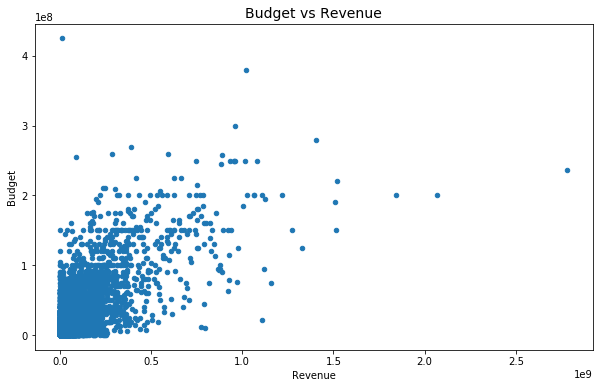

In [105]:
tmdb_df.plot(x = 'revenue', y= 'budget', kind= 'scatter',figsize=(10,6))
plt.xlabel('Revenue', fontsize=(10))
plt.ylabel('Budget', fontsize=(10))
plt.title('Budget vs Revenue', fontsize=(14))


<li>Here we could show that Revenue and Budget have positive correlation</li>
<li>When the Revenue tends to increse the Budget increases</li> 

# Research Question 2 (Top 10 movies by budget)

In [63]:
#get top budget movies
top = tmdb_df.nlargest(10,'budget')
top

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
2244,46528,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010
3375,1865,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,2011-05-11,3180,6.3,2011
7387,285,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,2007-05-19,2626,6.8,2007
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,2015-04-22,4304,7.4,2015
6570,1452,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,2006-06-28,834,5.3,2006
1929,38757,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,100,Animation|Family,2010-11-24,2019,7.3,2010
4411,49529,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,Andrew Stanton,132,Action|Adventure|Fantasy|Science Fiction,2012-03-07,1479,6.0,2012
7394,559,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,139,Fantasy|Action|Adventure,2007-05-01,2083,5.8,2007
5508,57201,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,2013-07-03,1607,6.0,2013
634,122917,10.174599,250000000,955119788,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,144,Adventure|Fantasy,2014-12-10,3110,7.1,2014


In [64]:
movies = top.groupby('original_title').max().budget
movies

original_title
Avengers: Age of Ultron                        280000000
John Carter                                    260000000
Pirates of the Caribbean: At World's End       300000000
Pirates of the Caribbean: On Stranger Tides    380000000
Spider-Man 3                                   258000000
Superman Returns                               270000000
Tangled                                        260000000
The Hobbit: The Battle of the Five Armies      250000000
The Lone Ranger                                255000000
The Warrior's Way                              425000000
Name: budget, dtype: int64

In [65]:
#sort movies
sort_movie = movies.sort_values(ascending=False)
sort_movie

original_title
The Warrior's Way                              425000000
Pirates of the Caribbean: On Stranger Tides    380000000
Pirates of the Caribbean: At World's End       300000000
Avengers: Age of Ultron                        280000000
Superman Returns                               270000000
Tangled                                        260000000
John Carter                                    260000000
Spider-Man 3                                   258000000
The Lone Ranger                                255000000
The Hobbit: The Battle of the Five Armies      250000000
Name: budget, dtype: int64

Text(0.5,1,'Top 10 Movies by Budget')

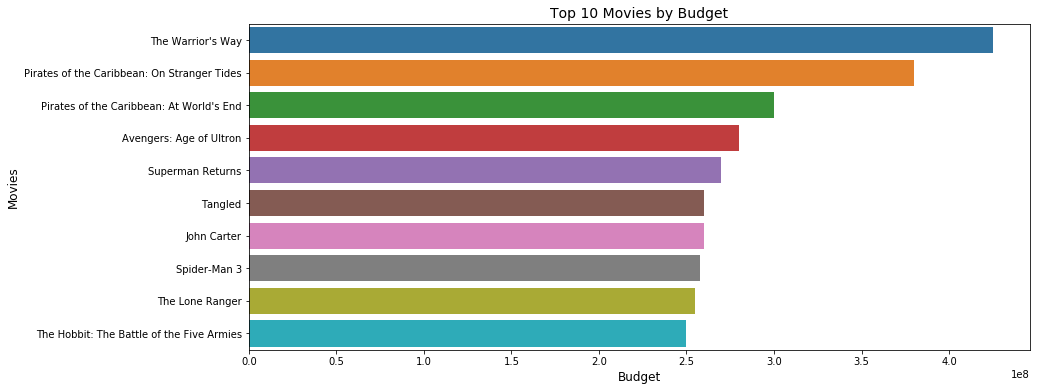

In [66]:
#plot top Movies with largest budget
plt.subplots(figsize=(14,6))
sns.barplot(x=sort_movie[:10], y = sort_movie.index[:10])
plt.xlabel('Budget', fontsize=(12))
plt.ylabel('Movies', fontsize=(12))
plt.title('Top 10 Movies by Budget', fontsize=(14))

Here's the Highest Movie with Budget: The Warrior's Way.

### Research Question 3  (Top 10 movies by Profit)

In [67]:
#add profit column
profit = tmdb_df['revenue'] - tmdb_df['budget']
tmdb_df['profit'] = profit

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
top_profit= tmdb_df.nlargest(10,'profit')
top_profit

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,1645034188
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360
4361,24428,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,2012-04-25,8903,7.3,2012,1299557910
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,2011-07-07,3750,7.7,2011,1202817822
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,2015-04-22,4304,7.4,2015,1125035767
5422,109445,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,2013-11-27,3369,7.5,2013,1124219009
8094,1642,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,1995-07-28,201,5.6,1995,1084279658


In [69]:
movies_profit = top_profit.groupby('original_title').max().profit
movies_profit

original_title
Avatar                                          2544505847
Avengers: Age of Ultron                         1125035767
Frozen                                          1124219009
Furious 7                                       1316249360
Harry Potter and the Deathly Hallows: Part 2    1202817822
Jurassic World                                  1363528810
Star Wars: The Force Awakens                    1868178225
The Avengers                                    1299557910
The Net                                         1084279658
Titanic                                         1645034188
Name: profit, dtype: int64

In [70]:
#sort movies
sort_movies = movies_profit.sort_values(ascending=False)
sort_movies

original_title
Avatar                                          2544505847
Star Wars: The Force Awakens                    1868178225
Titanic                                         1645034188
Jurassic World                                  1363528810
Furious 7                                       1316249360
The Avengers                                    1299557910
Harry Potter and the Deathly Hallows: Part 2    1202817822
Avengers: Age of Ultron                         1125035767
Frozen                                          1124219009
The Net                                         1084279658
Name: profit, dtype: int64

Text(0.5,1,'Top 10 Movies by Profit')

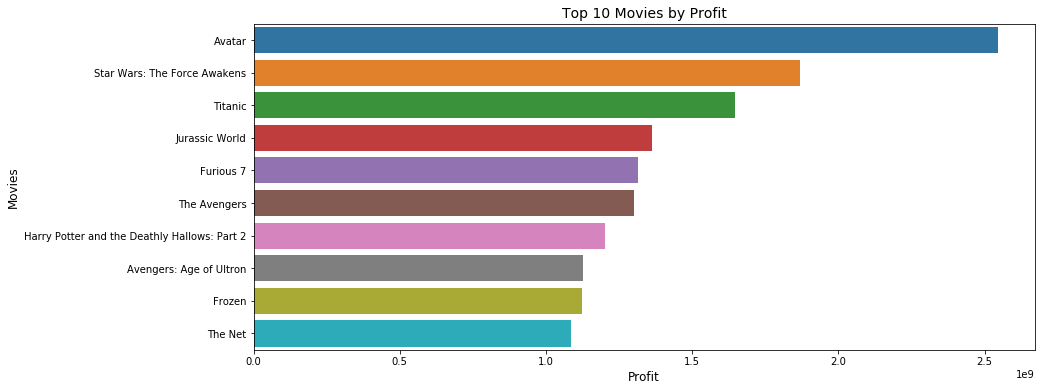

In [71]:
#plot highest profit movies
plt.subplots(figsize=(14,6))
sns.barplot(x=sort_movies[:10], y = sort_movies.index[:10])
plt.xlabel('Profit', fontsize=(12))
plt.ylabel('Movies', fontsize=(12))
plt.title('Top 10 Movies by Profit', fontsize=(14))

The Movie has largest Profit is: Avatar

### Research Question 4 (Popularity vs Revenue)

Text(0,0.5,'Popularity')

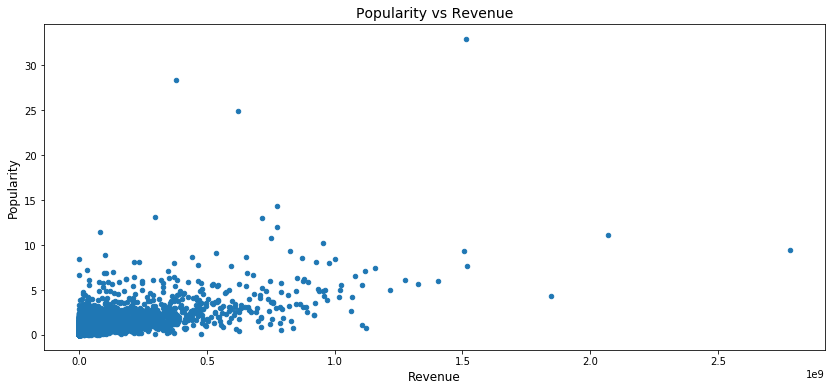

In [108]:
tmdb_df.plot(x = 'revenue', y = 'popularity', kind = 'scatter', figsize=(14,6))
plt.title('Popularity vs Revenue', fontsize =(14))
plt.xlabel('Revenue', fontsize=(12))
plt.ylabel('Popularity', fontsize=(12))

<li>Here we could show that Revenue and Popularity have positive correlation</li>
<li>When the Revenue tends to increse the Popularity increases</li> 

### Research Question 5 (Popularity vs Profit)

Text(0,0.5,'Profit')

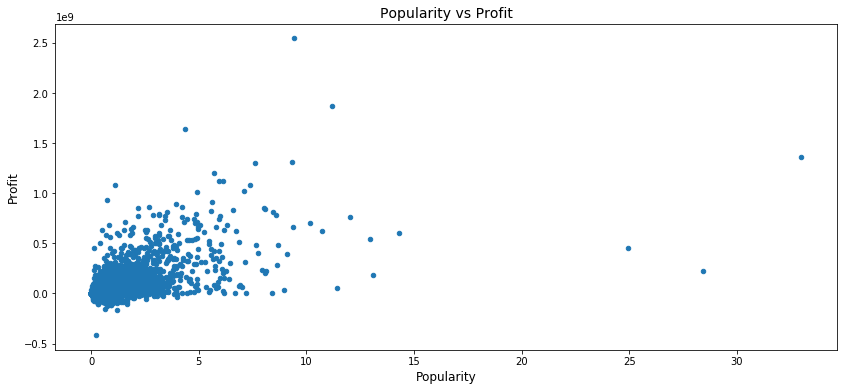

In [73]:
tmdb_df.plot(x = 'popularity', y = 'profit', kind = 'scatter', figsize=(14,6))
plt.title('Popularity vs Profit', fontsize =(14))
plt.xlabel('Popularity', fontsize=(12))
plt.ylabel('Profit', fontsize=(12))

<li>Here we could show that Profit and Popularity have positive correlation</li>

### Research Question 6 (Top 10 Movies by Rating)

In [74]:
rating= tmdb_df.nlargest(10,'vote_average')
rating

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
3894,125336,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,2011-09-03,14,9.2,2011,0
1200,374430,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,2014-12-16,41,8.8,2014,0
6911,24970,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145,Music,2006-07-09,23,8.7,2006,0
3690,68450,0.321341,0,0,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,80,Adventure|Documentary,2011-09-08,60,8.5,2011,0
8221,55676,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,Martin Scorsese|Michael Henry Wilson,225,Documentary,1995-05-21,11,8.5,1995,0
8411,25093,0.302908,0,0,Queen - Rock Montreal,Freddie Mercury|Roger Taylor|John Deacon|Brian...,Saul Swimmer,138,Music,1981-11-24,14,8.5,1981,0
8839,16275,0.157001,0,0,Dave Chappelle: Killin' Them Softly,Dave Chappelle,Stan Lathan,57,Comedy,2000-01-01,17,8.5,2000,0
609,321640,0.033378,0,0,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,240,Documentary,2015-02-08,72,8.4,2015,0
2334,41120,0.145026,0,0,Rush: Beyond the Lighted Stage,Sebastian Bach|Jack Black|Jimmy Chamberlin|Ged...,Sam Dunn|Scot McFadyen,107,Documentary|Music,2010-06-29,14,8.4,2010,0
4178,278,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142,Drama|Crime,1994-09-10,5754,8.4,1994,3341469


Text(0.5,1,'Top 10 Movies by Rating')

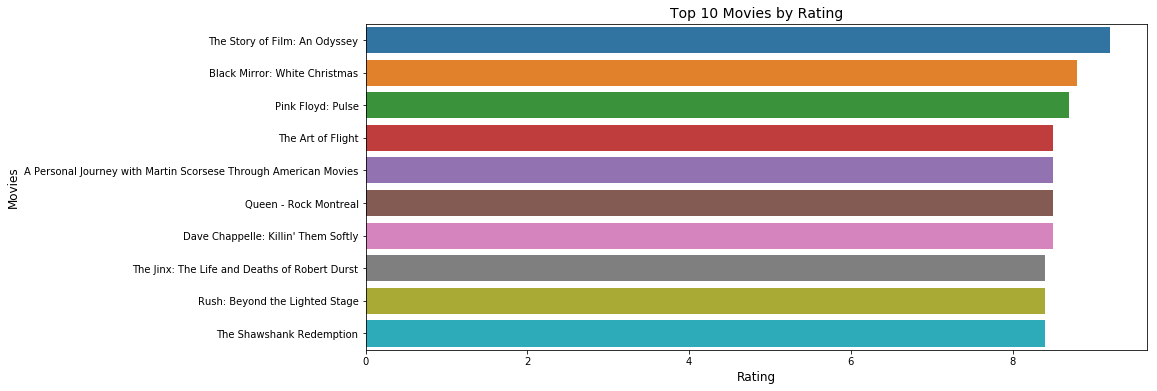

In [76]:
plt.subplots(figsize=(14,6))
ax = sns.barplot(x= 'vote_average', y='original_title', data=rating)
plt.xlabel('Rating', fontsize=(12))
plt.ylabel('Movies', fontsize=(12))
plt.title('Top 10 Movies by Rating', fontsize=(14))

The top 3 Movies Which have highest Rating: The Story of Film: An odyssey, Black Mirror: White Christmas and Pink Floyd:Plus

### Research Question 7 (Average Genres Revenue)

In [77]:
#put id as index
df = tmdb_df.set_index('id')
df

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
id,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1868178225
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1316249360
281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015,397950503
87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015,285603537
286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015,487380321
211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,1082730962


In [78]:
#split genres
genres_df = df['genres'].str.split("|", expand=True)

In [79]:
# Creating a separate dataframe form unique genres records.
genres_df = genres_df.stack()

genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [80]:
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
genres_df.genres_adj.value_counts()

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres_adj, dtype: int64

In [81]:
#merge column with original data
tmdb_df = tmdb_df.merge(genres_df, on = 'id')
tmdb_df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit,genres_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810,Action
1,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810,Adventure
2,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810,Science Fiction
3,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810,Thriller
4,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354,Action
5,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354,Adventure
6,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354,Science Fiction
7,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,228436354,Thriller
8,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201,Adventure
9,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,185238201,Science Fiction


In [82]:
tmdb_df = tmdb_df.groupby(['genres_adj'])['revenue'].mean()
#tmdb_df.plot(kind = 'barh', x = 'genres_adj',figsize=(14,6))
#plt.title('Genres & Revenue', fontsize =(14))
#plt.xlabel('Genres', fontsize=(12))
#plt.ylabel('Revenue', fontsize=(12))

Text(0,0.5,'Revenue')

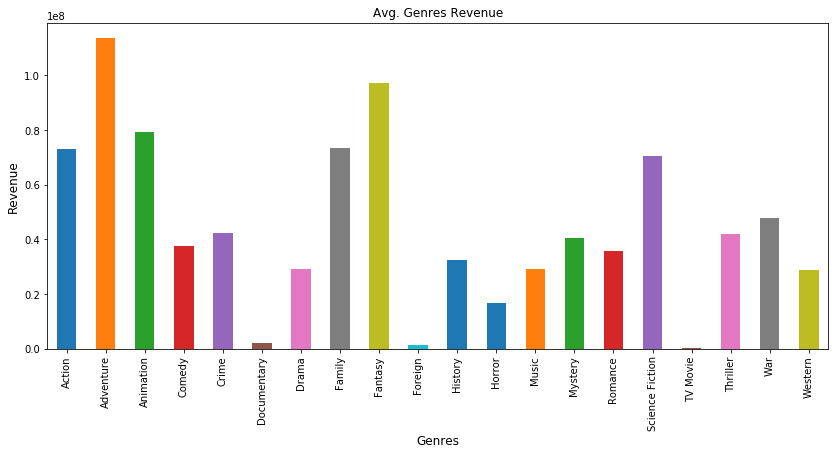

In [83]:
tmdb_df.plot(kind = 'bar', title = 'Avg. Genres Revenue',figsize=(14,6));
plt.xlabel('Genres', fontsize=(12))
plt.ylabel('Revenue', fontsize=(12))

The Genre which has the Highest Revenue is: Adventure 

<a id='conclusions'></a>
## Conclusions




After Data Wrangling, Cleaning and Analysis, the dataset provide many information like: 

<il>1- positive correlation, When the Revenue tends to increse the Budget increases</il>
<li>2- Top movie by budget is: The Warrior's Way</li>
<li>3- The movie whicha has the highest profit is: Avatar</li>
<li>4- positive correlation, When the Revenue tends to increse the Popularity increases</li>
<li>5- positive correlation, When the Revenue tends to increse the Profit increases</li>
<li>6- Top Movie by Rating: The Story of Film: An Odyssey</li>
<li>7- The Top Genres which have the Highest Revenue is: Adventure, Fantasy and Animation.</li>

## Limitations

The Limitations of the Tmdb Movies Data are: 
<ul>
<li>Alot of Null Values in some columns, So I dropped the Null Values, which would definitly affect the result.</li>
<li>Some fields I didn't need them, so I deleted them.</li>
<li>Some fields have the wrong datatype, So I corrected it.</li>
<li>Also the Genres column, I split the data seperated by '|' for easy analysis, This increases the time taken in calculating the result.</li>
</ul>

In [110]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0